In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
df = pd.read_excel(r'C:\Users\Emirkan\Desktop\Feature Engineering\Profiles_for_HiperCrop_Marketing.xlsx')

In [4]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality
0,Sarah Miller,34,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,American
1,Raj Patel,28,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,Indian
2,Wei Zhang,42,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,Chinese
3,Claudia Espinoza,30,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,Mexican
4,Mark Anderson,38,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,British
...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,British
67,Sofia Rios,22,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,Brazilian
68,Michael Lee,45,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,American
69,Nina Kaur,48,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,Indian


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           71 non-null     object
 1   Age                            71 non-null     int64 
 2   Income Group                   71 non-null     object
 3   Education Level                71 non-null     object
 4   Location                       71 non-null     object
 5   Tech Proficiency               71 non-null     object
 6   Social Interaction Preference  71 non-null     object
 7   Podcast/Video Choice           71 non-null     object
 8   Charity Focus                  71 non-null     object
 9   Smartphone Choice              71 non-null     object
 10  Nationality                    71 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.2+ KB


In [6]:
df.describe()

,Age
count,71.000000
mean,35.352113
std,8.577543
min,21.000000
25%,29.500000
50%,34.000000
75%,39.000000
max,67.000000


In [7]:
df.head()

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality
0,Sarah Miller,34,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,American
1,Raj Patel,28,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,Indian
2,Wei Zhang,42,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,Chinese
3,Claudia Espinoza,30,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,Mexican
4,Mark Anderson,38,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,British


In [8]:
print(df.isnull().sum())
# There is no missing data.

Name                             0
Age                              0
Income Group                     0
Education Level                  0
Location                         0
Tech Proficiency                 0
Social Interaction Preference    0
Podcast/Video Choice             0
Charity Focus                    0
Smartphone Choice                0
Nationality                      0
dtype: int64


In [9]:
Q1 = df['Age'].quantile(0.25)
Q3= df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [11]:
df['Age'] = df['Age'].clip(lower_bound, upper_bound)

In [12]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

In [13]:
age_counts = df['age_group'].value_counts().sort_index()

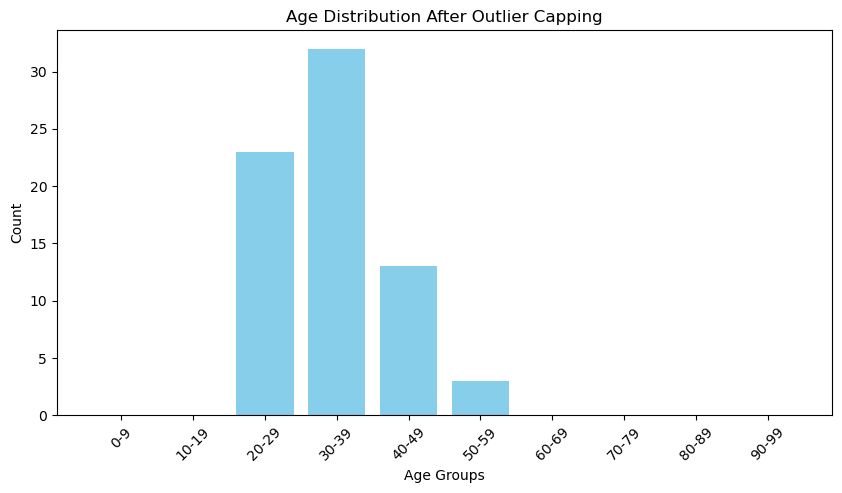

In [14]:
# plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values, color = 'skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Distribution After Outlier Capping')
plt.xticks(rotation=45)
plt.show();

In [15]:
age_skewness = skew(df['Age'])
print(f'Skewness of Age Distribution: {age_skewness:.3f}')

Skewness of Age Distribution: 0.592


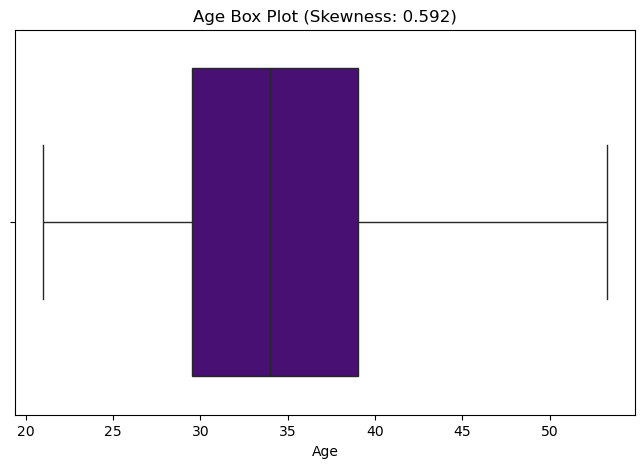

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'], color=(75/255, 0/255, 130/255))
plt.xlabel('Age')
plt.title(f'Age Box Plot (Skewness: {age_skewness:.3f})')
plt.show();

<Axes: xlabel='Age', ylabel='Count'>

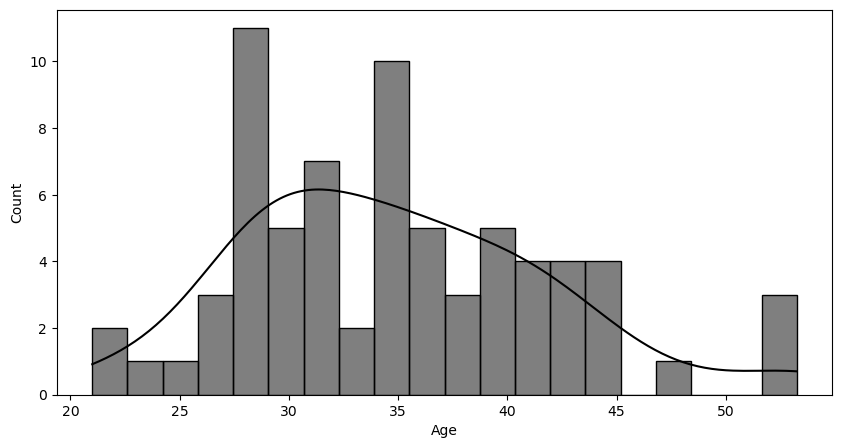

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='black')

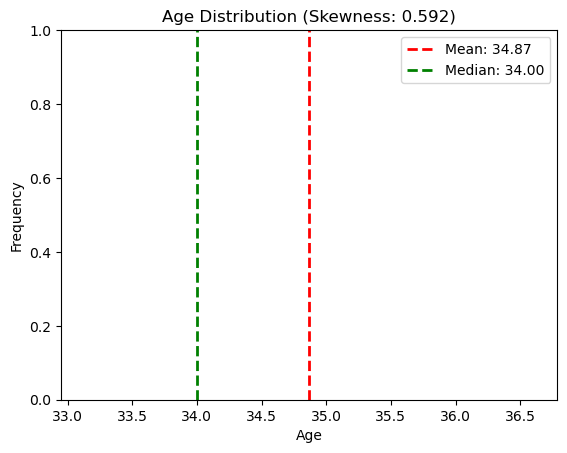

In [18]:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(f'Age Distribution (Skewness: {age_skewness:.3f})')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Age'].mean():.2f}")
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {df['Age'].median():.2f}")
plt.legend()
plt.show();

In [19]:
print(df.columns)

Index(['Name', 'Age', 'Income Group', 'Education Level', 'Location',
       'Tech Proficiency', 'Social Interaction Preference',
       'Podcast/Video Choice', 'Charity Focus', 'Smartphone Choice',
       'Nationality', 'age_group'],
      dtype='object')


In [20]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality,age_group
0,Sarah Miller,34.0,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,American,30-39
1,Raj Patel,28.0,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,Indian,20-29
2,Wei Zhang,42.0,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,Chinese,40-49
3,Claudia Espinoza,30.0,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,Mexican,20-29
4,Mark Anderson,38.0,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,British,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21.0,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,British,20-29
67,Sofia Rios,22.0,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,Brazilian,20-29
68,Michael Lee,45.0,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,American,40-49
69,Nina Kaur,48.0,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,Indian,40-49


In [21]:
print(df['Nationality'].head())

0    American
1      Indian
2     Chinese
3     Mexican
4     British
Name: Nationality, dtype: object


In [22]:
print(df['Nationality'].value_counts())

Nationality
American        7
Russian         6
Canadian        5
British         4
South Korean    4
Australian      4
Brazilian       3
Indian          3
Italian         3
French          3
Nigerian        3
Mexican         3
Emirati         2
Japanese        2
Kenyan          2
Singaporean     2
Spanish         2
Chinese         2
Sudanese        1
Jordanian       1
Colombian       1
Swiss           1
Iranian         1
Moroccan        1
Taiwanese       1
Ghanaian        1
German          1
Irish           1
Polish          1
Name: count, dtype: int64


In [23]:
df['Nationality'] = df['Nationality'].str.strip().str.lower()

In [24]:
print(df['Nationality'].value_counts())

Nationality
american        7
russian         6
canadian        5
british         4
south korean    4
australian      4
brazilian       3
indian          3
italian         3
french          3
nigerian        3
mexican         3
emirati         2
japanese        2
kenyan          2
singaporean     2
spanish         2
chinese         2
sudanese        1
jordanian       1
colombian       1
swiss           1
iranian         1
moroccan        1
taiwanese       1
ghanaian        1
german          1
irish           1
polish          1
Name: count, dtype: int64


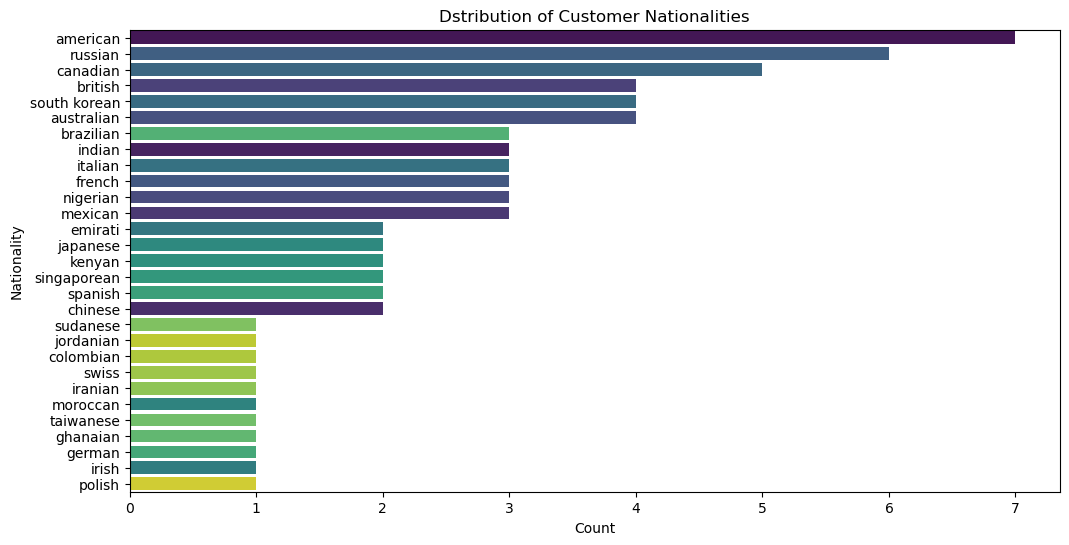

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Nationality'],
              order=df['Nationality'].value_counts().index,
              hue=df['Nationality'],
              palette="viridis",
              legend=False)
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.title("Dstribution of Customer Nationalities")
plt.show();

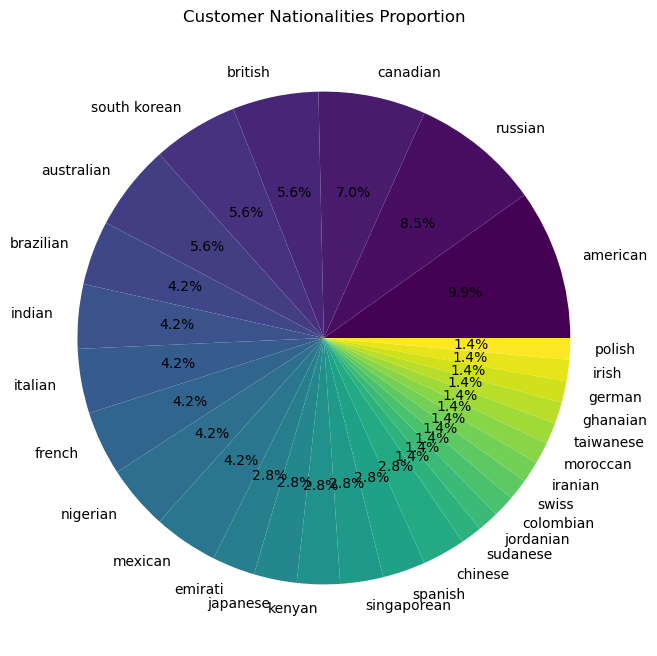

In [26]:
df['Nationality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='viridis')
plt.title("Customer Nationalities Proportion")
plt.ylabel("") # Hides the y-label
plt.show();

In [27]:
# United Nations Country Division: https://ourworldindata.org/world-region-map-definitions

In [28]:
# Define UN regions with country lists
regions = {
    "Europe and Northern America": [
        "USA", "Russia", "Canada", "Britain", "Italy", "France", 
        "Germany", "Ireland", "Poland", "Switzerland"
    ],
    "Central and Southern Asia": ["India", "Iran"],
    "Eastern and South-Eastern Asia": ["China", "Japan", "South Korea", "Singapore", "Taiwan"],
    "Latin America and the Caribbean": ["Mexico", "Brazil", "Colombia"],
    "Northern Africa and Western Asia": ["United Arab Emirates", "Jordan", "Morocco"],
    "Sub-Saharan Africa": ["Nigeria", "Kenya", "Ghana", "Sudan"],
    "Australia and New Zealand": ["Australia"]
}

# Create the mapping dictionary using dictionary comprehension
un_regions = {country: region for region, countries in regions.items() for country in countries}

# Print the final dictionary
print(un_regions)

{'USA': 'Europe and Northern America', 'Russia': 'Europe and Northern America', 'Canada': 'Europe and Northern America', 'Britain': 'Europe and Northern America', 'Italy': 'Europe and Northern America', 'France': 'Europe and Northern America', 'Germany': 'Europe and Northern America', 'Ireland': 'Europe and Northern America', 'Poland': 'Europe and Northern America', 'Switzerland': 'Europe and Northern America', 'India': 'Central and Southern Asia', 'Iran': 'Central and Southern Asia', 'China': 'Eastern and South-Eastern Asia', 'Japan': 'Eastern and South-Eastern Asia', 'South Korea': 'Eastern and South-Eastern Asia', 'Singapore': 'Eastern and South-Eastern Asia', 'Taiwan': 'Eastern and South-Eastern Asia', 'Mexico': 'Latin America and the Caribbean', 'Brazil': 'Latin America and the Caribbean', 'Colombia': 'Latin America and the Caribbean', 'United Arab Emirates': 'Northern Africa and Western Asia', 'Jordan': 'Northern Africa and Western Asia', 'Morocco': 'Northern Africa and Western A

In [29]:
df_regions = pd.DataFrame(list(un_regions.items()), columns = ['Country', 'Region'])

In [30]:
df_regions

,Country,Region
0,USA,Europe and Northern America
1,Russia,Europe and Northern America
2,Canada,Europe and Northern America
3,Britain,Europe and Northern America
4,Italy,Europe and Northern America
5,France,Europe and Northern America
6,Germany,Europe and Northern America
7,Ireland,Europe and Northern America
8,Poland,Europe and Northern America
9,Switzerland,Europe and Northern America


In [31]:
# Count the number of countries in each region
region_counts = df_regions['Region'].value_counts()

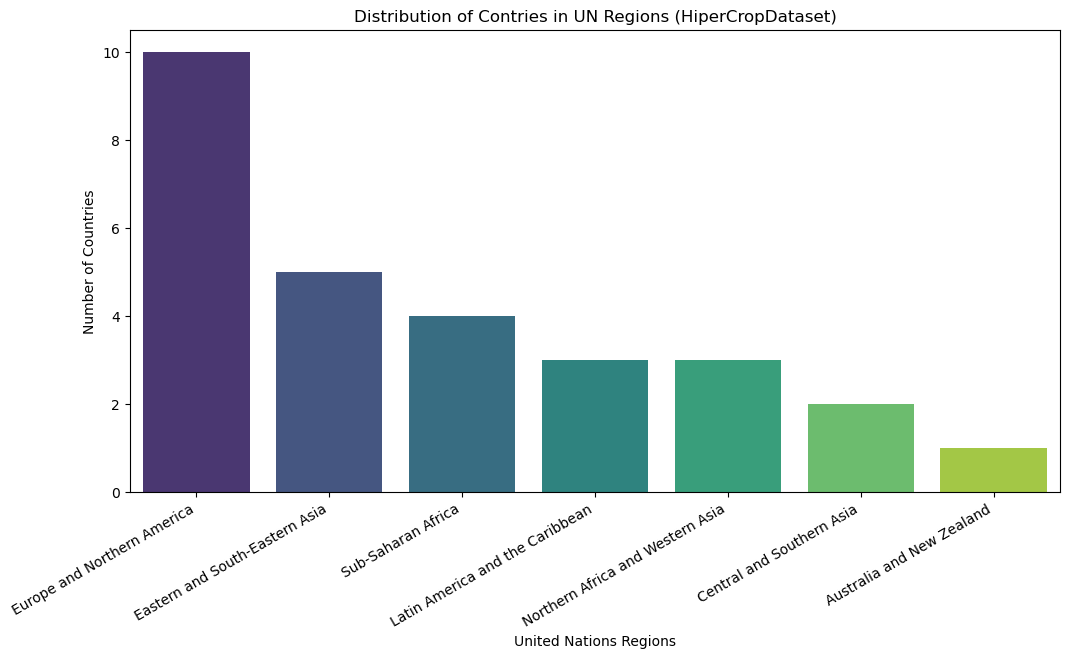

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette="viridis", legend=False)

plt.xlabel("United Nations Regions")
plt.ylabel("Number of Countries")
plt.title("Distribution of Contries in UN Regions (HiperCropDataset)")
plt.xticks(rotation=30, ha='right') # Rotate labels for better visibility
plt.show();

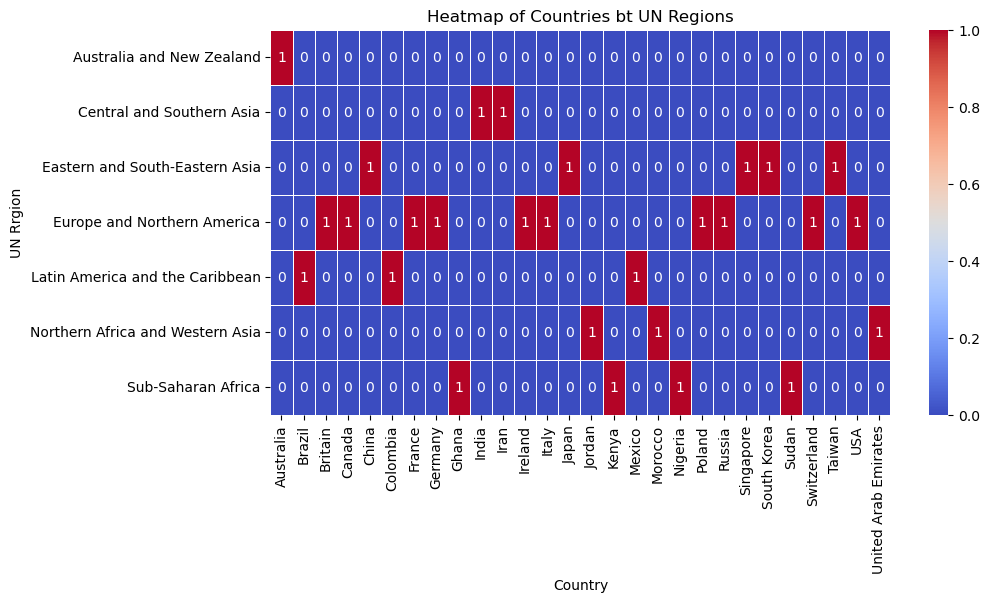

In [33]:
# The Heatmap of Countries by UN Regions
plt.figure(figsize=(10, 5))
heatmap_data = pd.crosstab(df_regions['Region'], df_regions['Country'])
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")

plt.xlabel("Country")
plt.ylabel("UN Rrgion")
plt.title("Heatmap of Countries bt UN Regions")
plt.xticks(rotation=90)  #Rotate country names
plt.show()

# Heatmap | Nationality vs Age

In [34]:
print(df_regions.head())

   Country                       Region
0      USA  Europe and Northern America
1   Russia  Europe and Northern America
2   Canada  Europe and Northern America
3  Britain  Europe and Northern America
4    Italy  Europe and Northern America


In [35]:
print(df_regions.isnull().sum())

Country    0
Region     0
dtype: int64


In [36]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality,age_group
0,Sarah Miller,34.0,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,american,30-39
1,Raj Patel,28.0,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,indian,20-29
2,Wei Zhang,42.0,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,chinese,40-49
3,Claudia Espinoza,30.0,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,mexican,20-29
4,Mark Anderson,38.0,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,british,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21.0,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,british,20-29
67,Sofia Rios,22.0,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,brazilian,20-29
68,Michael Lee,45.0,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,american,40-49
69,Nina Kaur,48.0,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,indian,40-49


In [37]:
df_regions

,Country,Region
0,USA,Europe and Northern America
1,Russia,Europe and Northern America
2,Canada,Europe and Northern America
3,Britain,Europe and Northern America
4,Italy,Europe and Northern America
5,France,Europe and Northern America
6,Germany,Europe and Northern America
7,Ireland,Europe and Northern America
8,Poland,Europe and Northern America
9,Switzerland,Europe and Northern America


In [38]:
print(df.columns)

Index(['Name', 'Age', 'Income Group', 'Education Level', 'Location',
       'Tech Proficiency', 'Social Interaction Preference',
       'Podcast/Video Choice', 'Charity Focus', 'Smartphone Choice',
       'Nationality', 'age_group'],
      dtype='object')


In [39]:
# Rename 'Nationality' to 'Country' in df (if Needed)
df = df.rename(columns={'country': 'nationality'})

In [40]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality,age_group
0,Sarah Miller,34.0,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,american,30-39
1,Raj Patel,28.0,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,indian,20-29
2,Wei Zhang,42.0,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,chinese,40-49
3,Claudia Espinoza,30.0,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,mexican,20-29
4,Mark Anderson,38.0,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,british,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21.0,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,british,20-29
67,Sofia Rios,22.0,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,brazilian,20-29
68,Michael Lee,45.0,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,american,40-49
69,Nina Kaur,48.0,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,indian,40-49


In [41]:
# Mapping of nationalities (df['nationality']) to countries (df_regions['country'])
nationality_to_country = {
    "american": "USA",
    "indian": "India",
    "chinese": "China",
    "mexican": "Mexico",
    "british": "Britain",
    "nigerian": "Nigeria",
    "australian": "Australia",
    "french": "France",
    "russian": "Russia",
    "canadian": "Canada",
    "south korean": "South Korea",
    "italian": "Italy",
    "emirati": "United Arab Emirates",
    "irish": "Ireland",
    "moroccan": "Morocco",
    "japanese": "Japan",
    "kenyan": "Kenya",
    "singaporean": "Singapore",
    "spanish": "Spain",
    "german": "Germany",
    "brazilian": "Brazil",
    "ghanaian": "Ghana",
    "taiwanese": "Taiwan",
    "sudanese": "Sudan",
    "iranian": "Iran",
    "swiss": "Switzerland",
    "colombian": "Colombia",
    "jordanian": "Jordan",
    "polish": "Poland"
}

In [42]:
df['country'] = df['Nationality'].map(nationality_to_country)

In [43]:
# Check if the mapping worked
print(df[['Nationality', 'country']].drop_duplicates())

     Nationality               country
0       american                   USA
1         indian                 India
2        chinese                 China
3        mexican                Mexico
4        british               Britain
5       nigerian               Nigeria
6     australian             Australia
7         french                France
8        russian                Russia
9       canadian                Canada
10  south korean           South Korea
12       italian                 Italy
13       emirati  United Arab Emirates
15         irish               Ireland
20      moroccan               Morocco
22      japanese                 Japan
23        kenyan                 Kenya
27   singaporean             Singapore
28       spanish                 Spain
31        german               Germany
32     brazilian                Brazil
33      ghanaian                 Ghana
40     taiwanese                Taiwan
41      sudanese                 Sudan
50       iranian         

In [44]:
df

,Name,Age,Income Group,Education Level,Location,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality,age_group,country
0,Sarah Miller,34.0,Upper-middle,Master's in Economics,"New York, USA",Advanced,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,american,30-39,USA
1,Raj Patel,28.0,Middle,Bachelor's in IT,"Bangalore, India",Intermediate,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,indian,20-29,India
2,Wei Zhang,42.0,High,PhD in Computer Science,"Shanghai, China",Expert,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,chinese,40-49,China
3,Claudia Espinoza,30.0,Lower-middle,Associate degree,"Mexico City, Mexico",Beginner,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,mexican,20-29,Mexico
4,Mark Anderson,38.0,High,MBA,"London, UK",Advanced,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,british,30-39,Britain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21.0,Lower,Undergraduate in Finance,"London, UK",Intermediate,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,british,20-29,Britain
67,Sofia Rios,22.0,Middle,Student (Marketing),"Rio de Janeiro, Brazil",Intermediate,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,brazilian,20-29,Brazil
68,Michael Lee,45.0,High,MBA,"San Francisco, USA",Advanced,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,american,40-49,USA
69,Nina Kaur,48.0,Upper-middle,PhD in Computer Science,"New Delhi, India",Expert,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,indian,40-49,India


In [45]:
df_aggregated = df.groupby('country')['age_group'].apply(lambda x: ', '.join(x.unique())).reset_index()
print(df_aggregated.head())

     country            age_group
0  Australia  30-39, 20-29, 50-59
1     Brazil         30-39, 20-29
2    Britain  30-39, 40-49, 20-29
3     Canada         30-39, 40-49
4      China         40-49, 30-39


In [46]:
print("Columns in df_regions:", df_regions.columns)
print("Columns in df_aggregated:", df_aggregated.columns)

Columns in df_regions: Index(['Country', 'Region'], dtype='object')
Columns in df_aggregated: Index(['country', 'age_group'], dtype='object')


In [47]:
# Normalize column names in both DataFrames
df_regions.columns = df_regions.columns.str.strip().str.lower()
df_aggregated.columns = df_aggregated.columns.str.strip().str.lower()

# Rename to ensure consistency
df_regions.rename(columns={'country': 'country'}, inplace=True)
df_aggregated.rename(columns={'country': 'country'}, inplace=True)

print("Updated df_regions columns:", df_regions.columns)
print("Updated df_aggregated columns:", df_aggregated.columns)

Updated df_regions columns: Index(['country', 'region'], dtype='object')
Updated df_aggregated columns: Index(['country', 'age_group'], dtype='object')


In [48]:
df_regions = df_regions.merge(df_aggregated, on='country', how='left')

In [49]:
print(df_regions.head())

   country                       region                   age_group
0      USA  Europe and Northern America  30-39, 40-49, 20-29, 50-59
1   Russia  Europe and Northern America         20-29, 30-39, 40-49
2   Canada  Europe and Northern America                30-39, 40-49
3  Britain  Europe and Northern America         30-39, 40-49, 20-29
4    Italy  Europe and Northern America                30-39, 20-29


In [50]:
# dropping the unnecessary duplicate columns
df_regions = df_regions.drop(columns=['age_group_x', 'age_group_y'], errors='ignore')

In [51]:
print(df_regions)

                 country                            region  \
0                    USA       Europe and Northern America   
1                 Russia       Europe and Northern America   
2                 Canada       Europe and Northern America   
3                Britain       Europe and Northern America   
4                  Italy       Europe and Northern America   
5                 France       Europe and Northern America   
6                Germany       Europe and Northern America   
7                Ireland       Europe and Northern America   
8                 Poland       Europe and Northern America   
9            Switzerland       Europe and Northern America   
10                 India         Central and Southern Asia   
11                  Iran         Central and Southern Asia   
12                 China    Eastern and South-Eastern Asia   
13                 Japan    Eastern and South-Eastern Asia   
14           South Korea    Eastern and South-Eastern Asia   
15      

In [52]:
heatmap_data = df_regions.explode('age_group')

In [53]:
heatmap_data = pd.crosstab(heatmap_data['age_group'], heatmap_data['country'])

In [54]:
print(heatmap_data.head())

country              Australia  Brazil  Britain  Canada  China  Colombia  \
age_group                                                                  
20-29                        0       0        0       0      0         1   
20-29, 30-39                 0       0        0       0      0         0   
20-29, 30-39, 40-49          0       0        0       0      0         0   
30-39                        0       0        0       0      0         0   
30-39, 20-29                 0       1        0       0      0         0   

country              France  Germany  Ghana  India  ...  Nigeria  Poland  \
age_group                                           ...                    
20-29                     0        0      0      0  ...        0       0   
20-29, 30-39              0        0      0      0  ...        0       0   
20-29, 30-39, 40-49       0        0      0      1  ...        1       0   
30-39                     0        0      1      0  ...        0       1   
30-39, 20-2

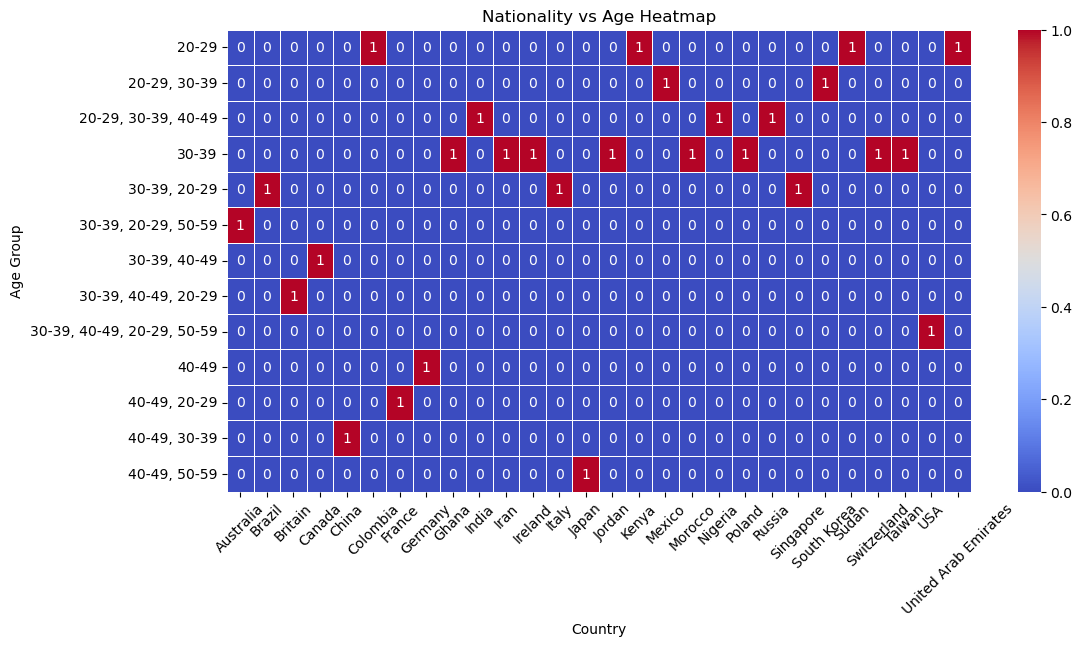

In [55]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True, fmt="d")

plt.xlabel("Country")
plt.ylabel("Age Group")
plt.title("Nationality vs Age Heatmap")
plt.xticks(rotation=45) # Rotate country names for better readability

plt.show();

In [56]:
df.columns

Index(['Name', 'Age', 'Income Group', 'Education Level', 'Location',
       'Tech Proficiency', 'Social Interaction Preference',
       'Podcast/Video Choice', 'Charity Focus', 'Smartphone Choice',
       'Nationality', 'age_group', 'country'],
      dtype='object')

In [57]:
heatmap_data_income = pd.crosstab(df['Income Group'], df['Nationality'])

In [58]:
print(heatmap_data_income.head())

Nationality   american  australian  brazilian  british  canadian  chinese  \
Income Group                                                                
High                 1           0          0        1         1        2   
Lower                0           0          0        1         0        0   
Lower-middle         0           0          0        0         0        0   
Middle               2           1          2        0         0        0   
Upper                2           1          0        1         1        0   

Nationality   colombian  emirati  french  german  ...  moroccan  nigerian  \
Income Group                                      ...                       
High                  0        0       2       1  ...         0         1   
Lower                 0        0       0       0  ...         0         0   
Lower-middle          0        0       0       0  ...         0         0   
Middle                1        1       1       0  ...         0         2  

In [59]:
print(df['Nationality'].isna().sum())
print(df['Nationality'].unique())

0
['american' 'indian' 'chinese' 'mexican' 'british' 'nigerian' 'australian'
 'french' 'russian' 'canadian' 'south korean' 'italian' 'emirati' 'irish'
 'moroccan' 'japanese' 'kenyan' 'singaporean' 'spanish' 'german'
 'brazilian' 'ghanaian' 'taiwanese' 'sudanese' 'iranian' 'swiss'
 'colombian' 'jordanian' 'polish']


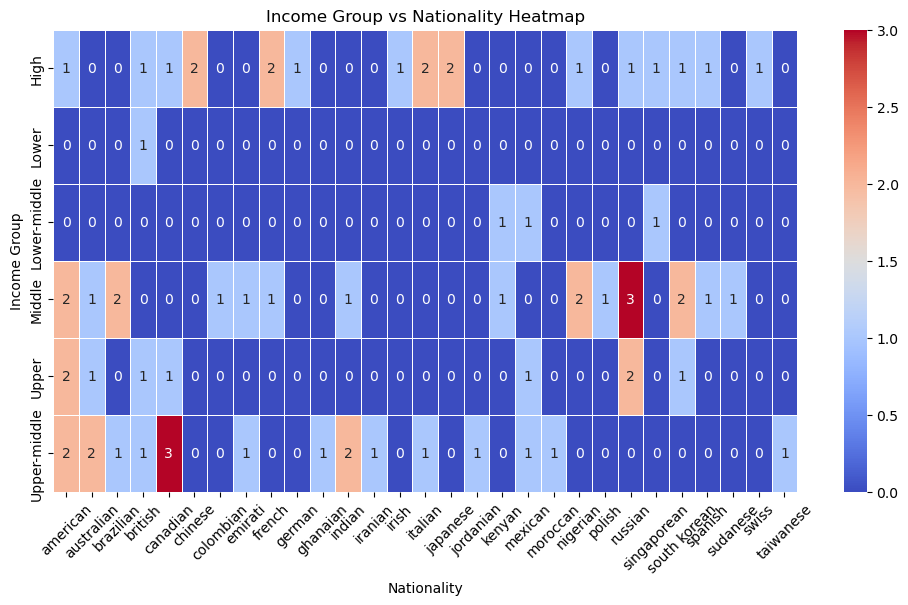

In [60]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_income, cmap='coolwarm', linewidths=0.5, annot=True, fmt="d")

plt.xlabel("Nationality")
plt.ylabel("Income Group")
plt.title("Income Group vs Nationality Heatmap")
plt.xticks(rotation=45)
plt.show();

In [61]:
df.columns

Index(['Name', 'Age', 'Income Group', 'Education Level', 'Location',
       'Tech Proficiency', 'Social Interaction Preference',
       'Podcast/Video Choice', 'Charity Focus', 'Smartphone Choice',
       'Nationality', 'age_group', 'country'],
      dtype='object')

# Applying Feature Importance

In [62]:
feature_columns = ['Income Group', 'Education Level', 'Tech Proficiency' , 'Location']
target_column = 'country'

In [63]:
print(df[feature_columns].dtypes)

Income Group        object
Education Level     object
Tech Proficiency    object
Location            object
dtype: object


In [64]:
# income group, education level and tech proficiency are going to be encoded as label encoding
# On the other hand location is going to be encoded as one-hot encoding.

In [65]:
label_features = ['Income Group', 'Education Level', 'Tech Proficiency']

In [66]:
# Apply label Encoding
le = LabelEncoder()
for col in label_features:
    df[col] = le.fit_transform(df[col])

In [67]:
print(df[label_features].head())

   Income Group  Education Level  Tech Proficiency
0             5               26                 0
1             3                9                 3
2             0               34                 2
3             2                0                 1
4             0               19                 0


In [68]:
# Apply one-hot encoding for location
ohe = OneHotEncoder(drop='first', sparse_output=False) #drop= 'first' prevents the dummy variable trap

In [69]:
location_encoded = ohe.fit_transform(df[['Location']])

In [70]:
location_df = pd.DataFrame(location_encoded, columns=ohe.get_feature_names_out(['Location']))

In [71]:
df = pd.concat([df, location_df], axis=1)

In [72]:
# drop the original 'location' column
df.drop(columns=['Location'], inplace=True)

In [73]:
df

,Name,Age,Income Group,Education Level,Tech Proficiency,Social Interaction Preference,Podcast/Video Choice,Charity Focus,Smartphone Choice,Nationality,...,"Location_Shanghai, China",Location_Singapore,"Location_St. Petersburg, Russia","Location_Sydney, Australia","Location_Taipei, Taiwan","Location_Tehran, Iran","Location_Tokyo, Japan","Location_Toronto, Canada","Location_Warsaw, Poland","Location_Zurich, Switzerland"
0,Sarah Miller,34.0,5,26,0,"LinkedIn, professional forums",Financial news and blockchain updates,Economic development,Samsung Galaxy S21,american,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Raj Patel,28.0,3,9,3,"Twitter, Reddit","Tech reviews, crypto forecasts",Technology in education,OnePlus 9,indian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wei Zhang,42.0,0,34,2,"Specialized forums, WeChat",Deep dives into blockchain technology,Environmental sustainability,Apple iPhone 12 Pro,chinese,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Claudia Espinoza,30.0,2,0,1,"Facebook, Instagram",Beginner blockchain guides,Children’s health and education,Motorola G8,mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mark Anderson,38.0,0,19,0,"LinkedIn, Twitter","Market trends, investment strategies",Wildlife conservation,Apple iPhone 13,british,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Tyler Green,21.0,1,44,3,"Twitter, TikTok","Personal finance, crypto memes",Mental health awareness,Google Pixel 5,british,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Sofia Rios,22.0,3,43,3,"WhatsApp, Instagram","Marketing trends, NFTs",Social equality,Samsung Galaxy A51,brazilian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Michael Lee,45.0,0,19,0,"LinkedIn, Twitter","Business strategies, blockchain",Education in underdeveloped regions,iPhone 13 Pro Max,american,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Nina Kaur,48.0,5,34,2,"LinkedIn, Reddit","AI, blockchain security",Women in STEM,OnePlus 8 Pro,indian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df.columns

Index(['Name', 'Age', 'Income Group', 'Education Level', 'Tech Proficiency',
       'Social Interaction Preference', 'Podcast/Video Choice',
       'Charity Focus', 'Smartphone Choice', 'Nationality', 'age_group',
       'country', 'Location_Amman, Jordan', 'Location_Bangalore, India',
       'Location_Berlin, Germany', 'Location_Bogotá, Colombia',
       'Location_Casablanca, Morocco', 'Location_Dubai, UAE',
       'Location_Dublin, Ireland', 'Location_Khartoum, Sudan',
       'Location_Lagos, Nigeria', 'Location_London, UK',
       'Location_Madrid, Spain', 'Location_Melbourne, Australia',
       'Location_Mexico City, Mexico', 'Location_Milan, Italy',
       'Location_Montreal, Canada', 'Location_Moscow, Russia',
       'Location_Mumbai, India', 'Location_Nairobi, Kenya',
       'Location_New Delhi, India', 'Location_New York, USA',
       'Location_Paris, France', 'Location_Rio de Janeiro, Brazil',
       'Location_Rome, Italy', 'Location_San Francisco, USA',
       'Location_Sao P

In [75]:
le_target = LabelEncoder()
df['country'] = le_target.fit_transform(df['country'])

In [76]:
print(df[['country']])

    country
0        27
1         9
2         4
3        16
4         2
..      ...
66        2
67        1
68       27
69        9
70       20

[71 rows x 1 columns]


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Ensure X (features) and y (target) are correctly defined
feature_columns = ['Income Group', 'Education Level', 'Tech Proficiency'] + list(location_df.columns)
target_column = 'country'

X = df[feature_columns]
y = df[target_column]

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Compute Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)  # ✅ Check if 'importances' is created correctly

Education Level                    0.106530
Income Group                       0.059326
Location_Moscow, Russia            0.058299
Location_New York, USA             0.057731
Location_Seoul, South Korea        0.053330
Tech Proficiency                   0.049431
Location_London, UK                0.046991
Location_Paris, France             0.036947
Location_Mexico City, Mexico       0.036933
Location_Lagos, Nigeria            0.035427
Location_Toronto, Canada           0.034022
Location_Sydney, Australia         0.030928
Location_Dubai, UAE                0.028889
Location_Montreal, Canada          0.024543
Location_Tokyo, Japan              0.024477
Location_Milan, Italy              0.022773
Location_Madrid, Spain             0.021688
Location_Shanghai, China           0.021232
Location_San Francisco, USA        0.019246
Location_Nairobi, Kenya            0.019137
Location_Singapore                 0.018143
Location_Rio de Janeiro, Brazil    0.016646
Location_Amman, Jordan          

C:\Users\Emirkan\AppData\Local\Temp\ipykernel_11224\4026786681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="coolwarm")


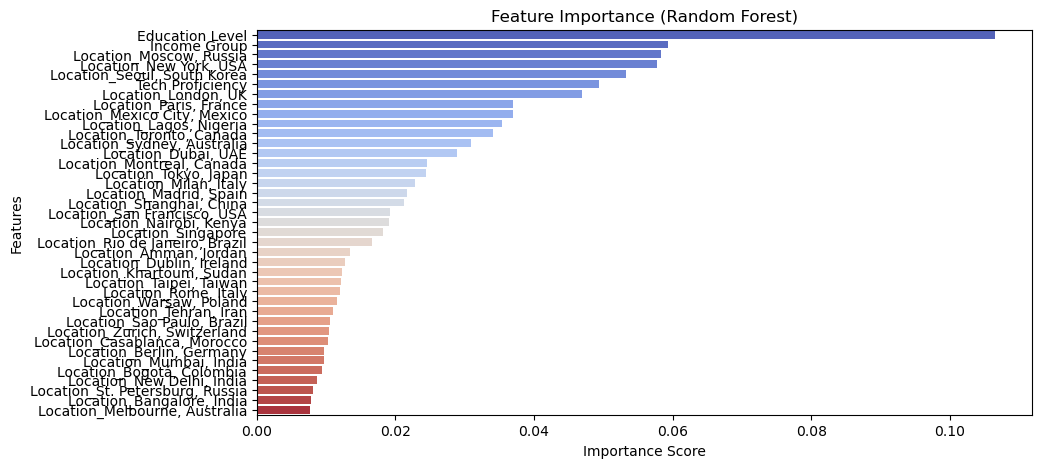

In [78]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index, palette="coolwarm")

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show();

<Axes: ylabel='None'>

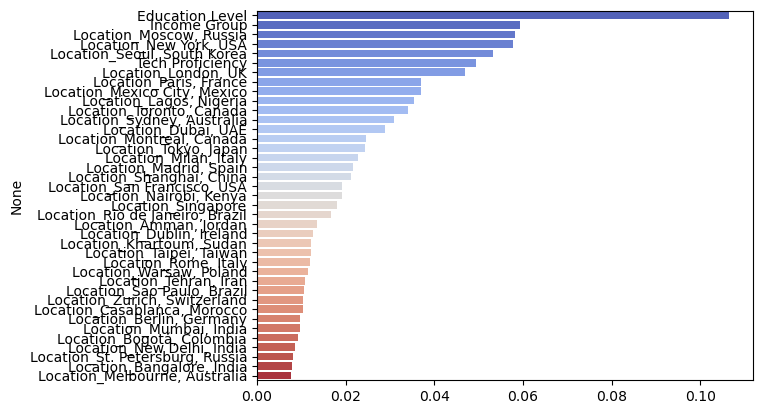

In [79]:
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette="coolwarm", legend=False)

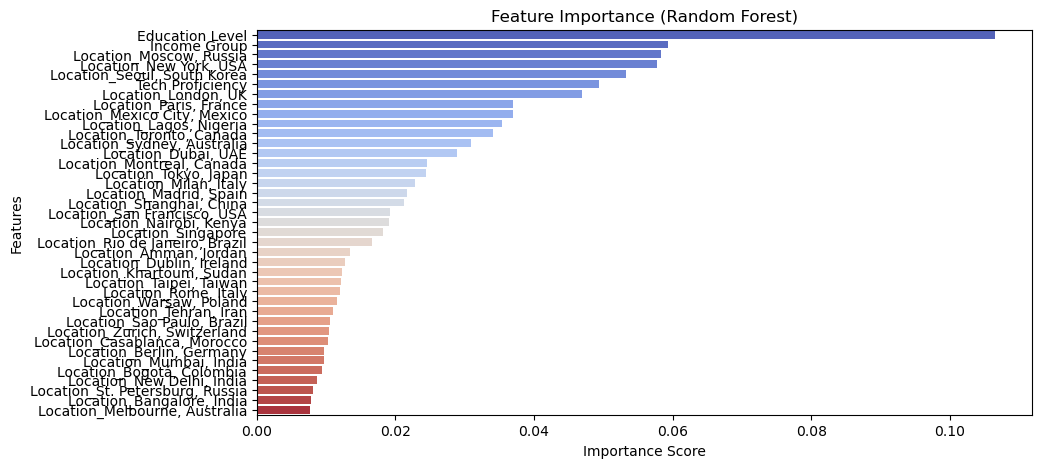

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Compute Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize Feature Importance (Fixing the FutureWarning)
plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette="coolwarm", legend=False)

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show();

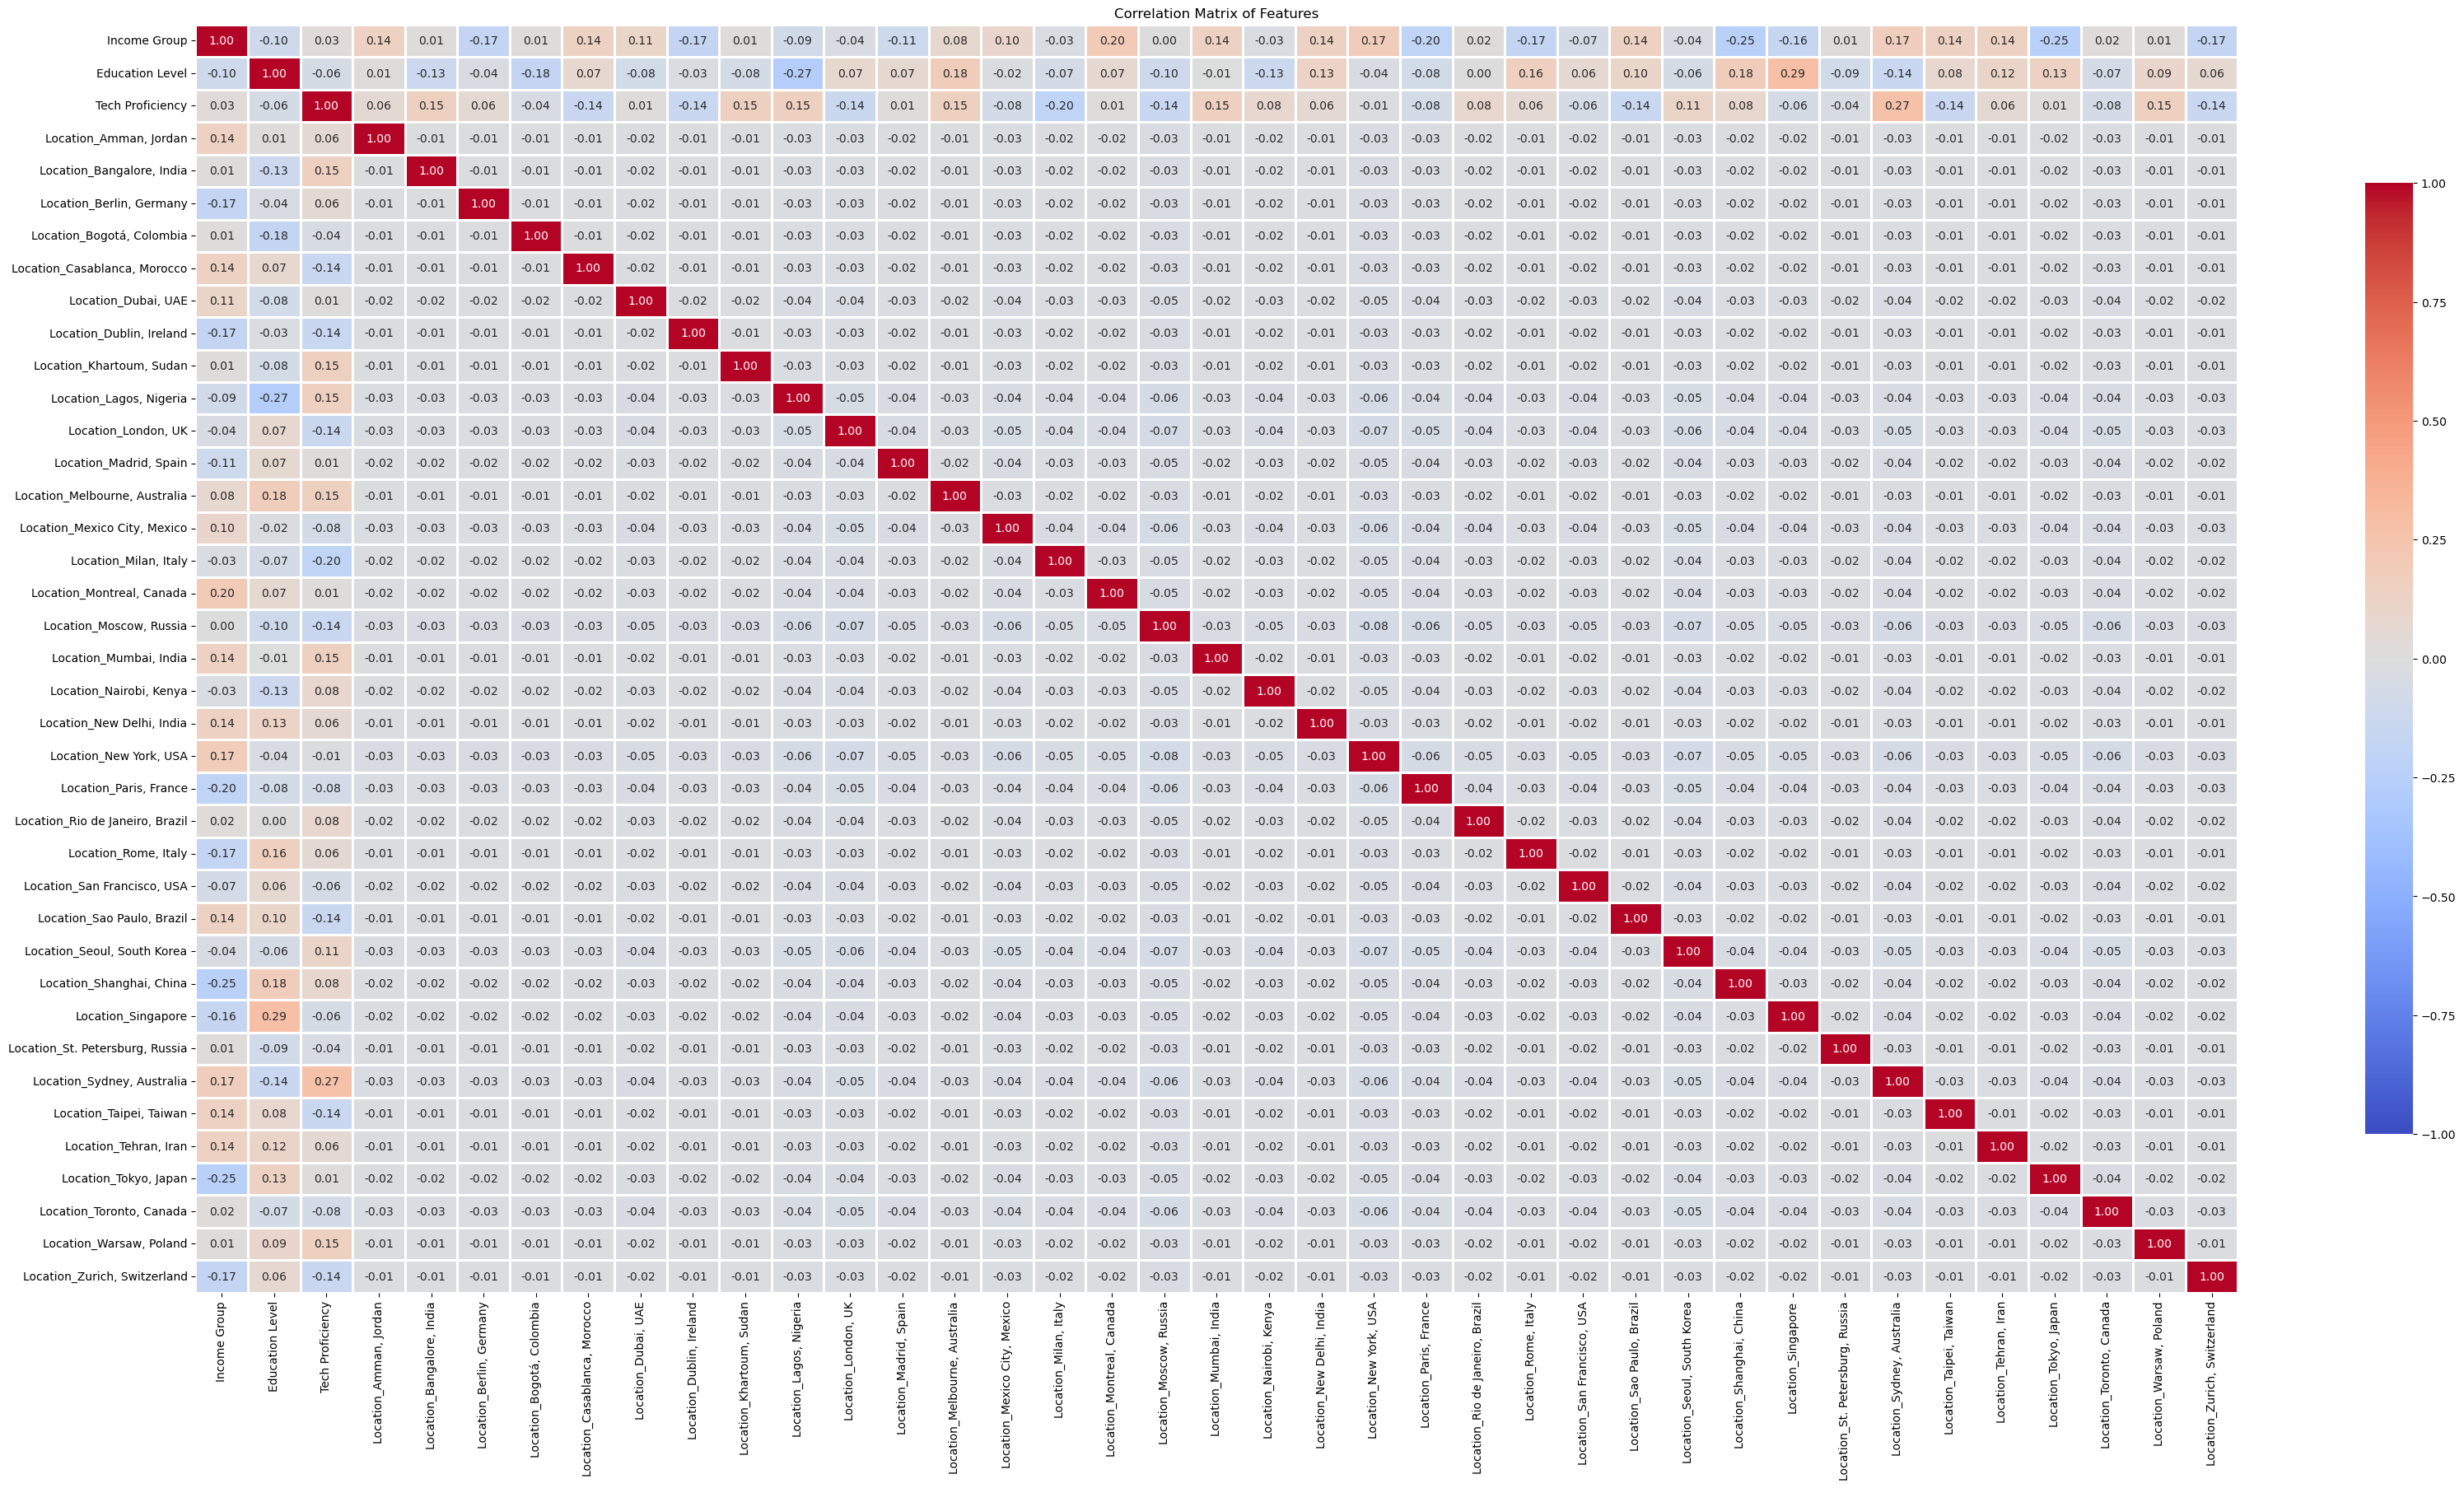

In [81]:
# 🚀 Step 1: Compute Correlation Matrix
correlation_matrix = df[feature_columns].corr()

# 🚀 Step 2: Visualize Correlation Matrix Using Heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, vmin=-1, vmax=1, center=0, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix of Features")
plt.show();